In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

In [7]:
train = pd.read_csv(r"C:\Users\Reet Dengle\Desktop\311\sem 5\DWR\final project\dwr_train (2).csv")

In [9]:
test = pd.read_csv(r"C:\Users\Reet Dengle\Desktop\311\sem 5\DWR\final project\dwr_test.csv")

In [11]:
df_combined = pd.concat([train, test], axis=0)


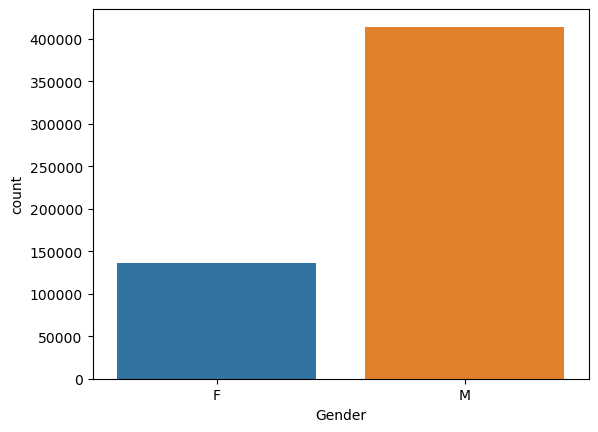

In [13]:
sns.countplot(x='Gender', data=train)
plt.show()

The graph shows that there are almost 3 times more male customers than female customers.

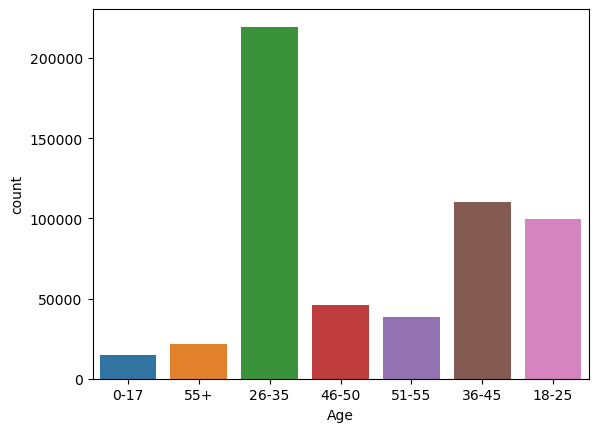

In [15]:
sns.countplot(x='Age',data=train)
plt.show()

The graph shows that the majority of the customers that purchase things during the sales season mainly belong to the age group of 26-35 and 36-45.

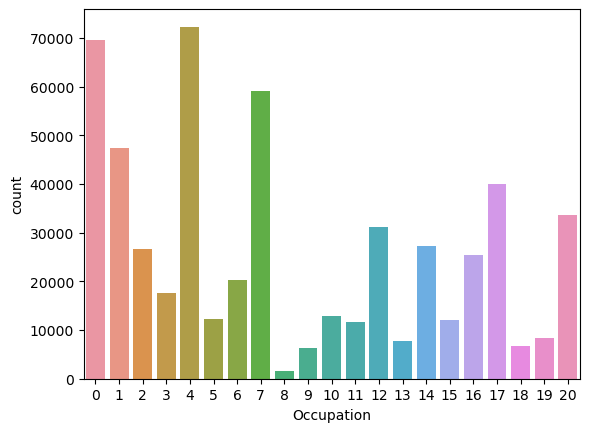

In [17]:
sns.countplot(x='Occupation',data=train)
plt.show()

The graph shows that top three Occupations with the majority of buyers is 4,0,7.

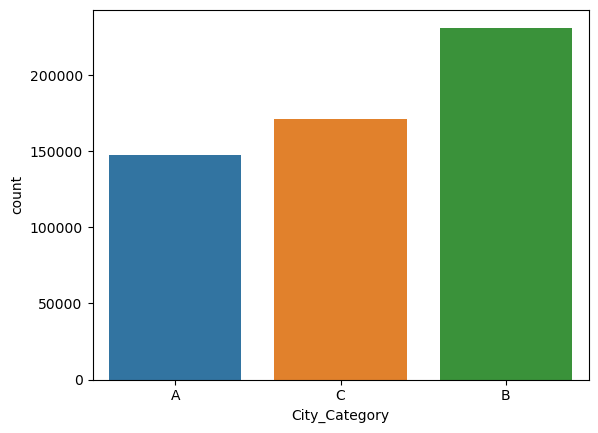

In [19]:
sns.countplot(x='City_Category',data=train)
plt.show()

The graph shows that people from city B buy majorly during the sale  

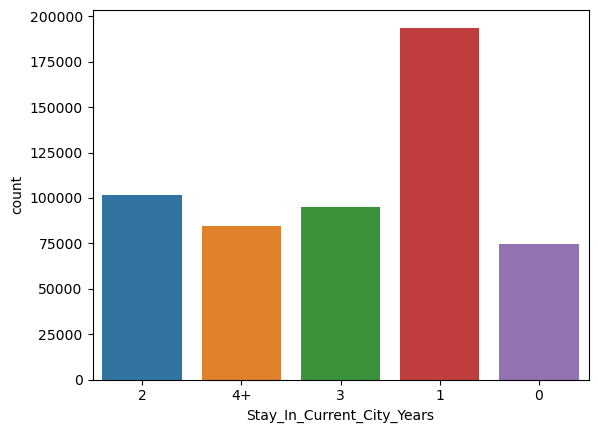

In [21]:
sns.countplot(x='Stay_In_Current_City_Years',data=train)
plt.show()

The graph shows that majority people buying during sales have lived in the current city for an year.

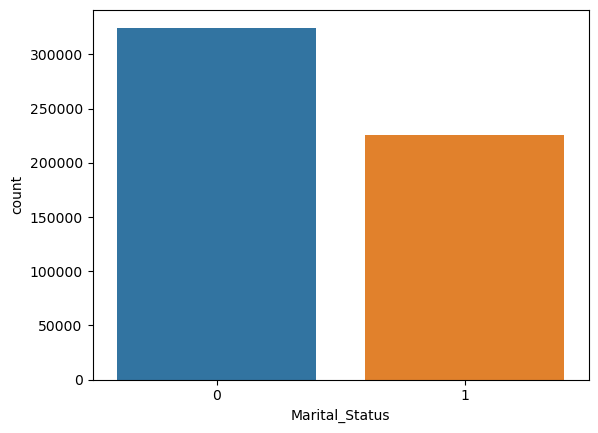

In [23]:
sns.countplot(x='Marital_Status',data=train)
plt.show()

The graphs shows that single people tend to buy more things during sales.

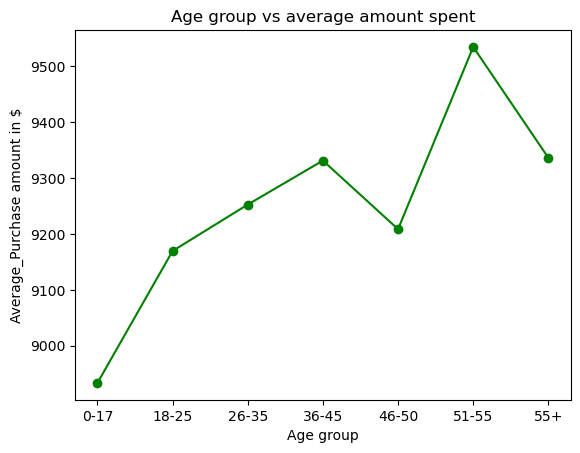

In [25]:
data = train.groupby('Age')['Purchase'].mean()
plt.plot(data.index,data.values,marker='o',color='g')
plt.xlabel('Age group');
plt.ylabel('Average_Purchase amount in $');
plt.title('Age group vs average amount spent');
plt.show()

The average amount spend by age group 51-55 is most during the festive season sales.

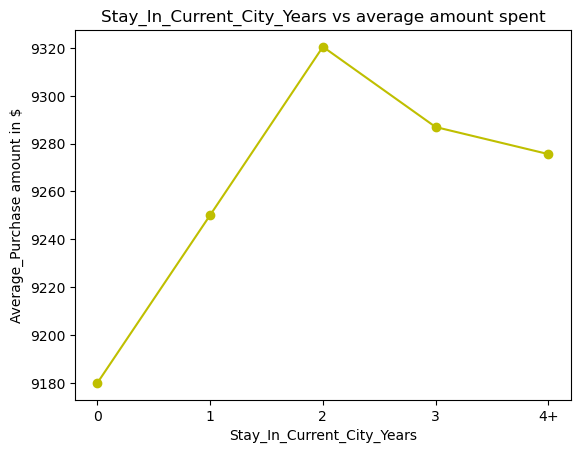

In [27]:
data = train.groupby('Stay_In_Current_City_Years')['Purchase'].mean()
plt.plot(data.index,data.values,marker='o',color='y')
plt.xlabel('Stay_In_Current_City_Years');
plt.ylabel('Average_Purchase amount in $');
plt.title('Stay_In_Current_City_Years vs average amount spent');
plt.show()

The people who have been living in the current city for 2 or more years are on an average spending more amount in the black friday sales

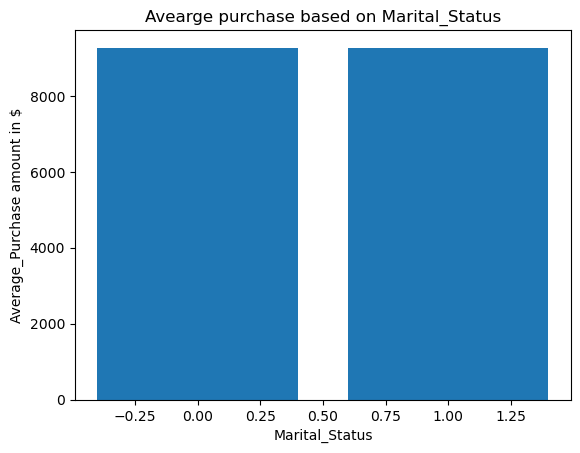

In [29]:
data = train.groupby('Marital_Status')['Purchase'].mean()
plt.bar(data.index,data.values)
plt.xlabel('Marital_Status');
plt.ylabel('Average_Purchase amount in $');
plt.title('Avearge purchase based on Marital_Status');
plt.show()

Purchasers who married or not, have almost same average of purchase.

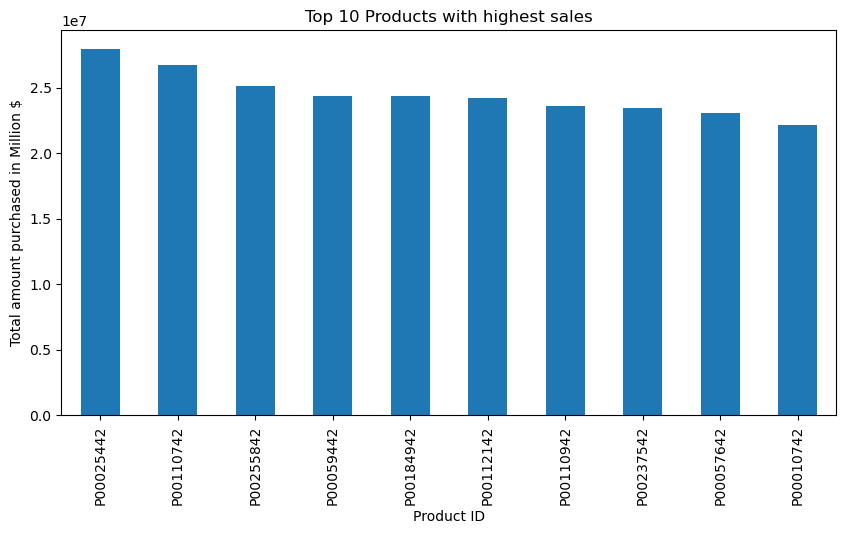

In [31]:
data = train.groupby("Product_ID").sum()['Purchase']

plt.figure(figsize=(10,5))
data.sort_values(ascending=False)[0:10].plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel('Product ID')
plt.ylabel('Total amount purchased in Million $')
plt.title('Top 10 Products with highest sales')
plt.show()

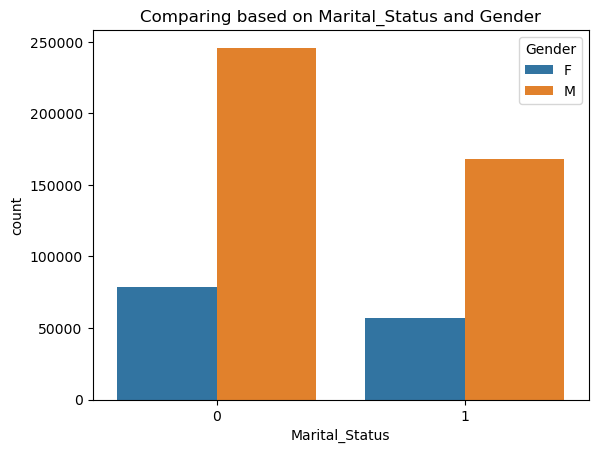

In [33]:
sns.countplot(x='Marital_Status',data=train,hue='Gender')
plt.title('Comparing based on Marital_Status and Gender')
plt.show()

Males tend to purchase more and Unmarried Males are around 45% in the data and they show to purchase 9000$ on average.

Products that are most purchased by each of the age group:

In [35]:
a = pd.crosstab(train['Age'],train['Product_ID'])
a.idxmax(axis=1)

Age
0-17     P00255842
18-25    P00265242
26-35    P00265242
36-45    P00025442
46-50    P00265242
51-55    P00265242
55+      P00265242
dtype: object

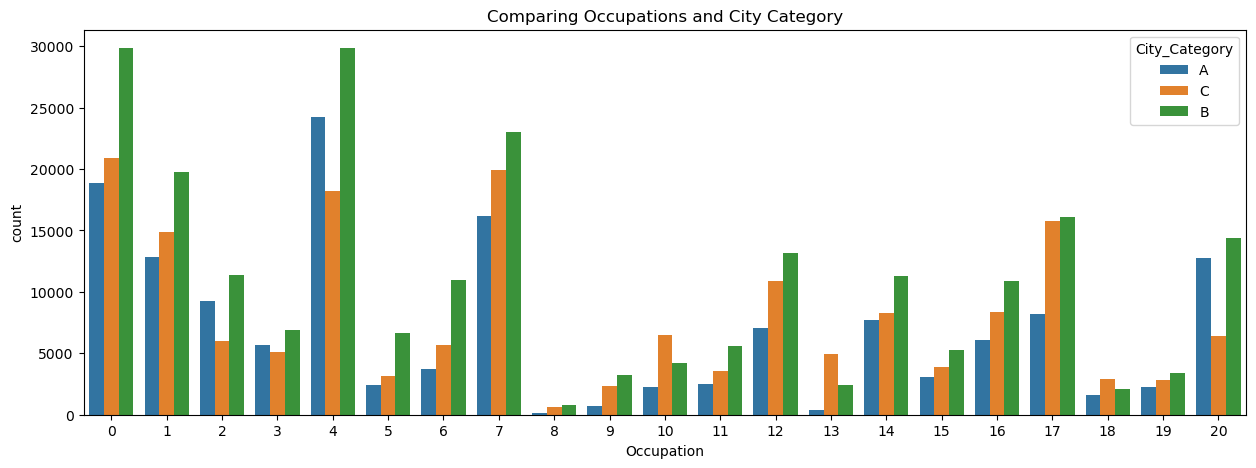

In [37]:
plt.figure(figsize=(15,5))
sns.countplot(x='Occupation',data=train,hue='City_Category')
plt.title('Comparing Occupations and City Category')
plt.show()

People from Occupation 4,0,7 are buying the most and most of the people from these occupations belong to City_Category B.

C:\Users\Reet Dengle\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


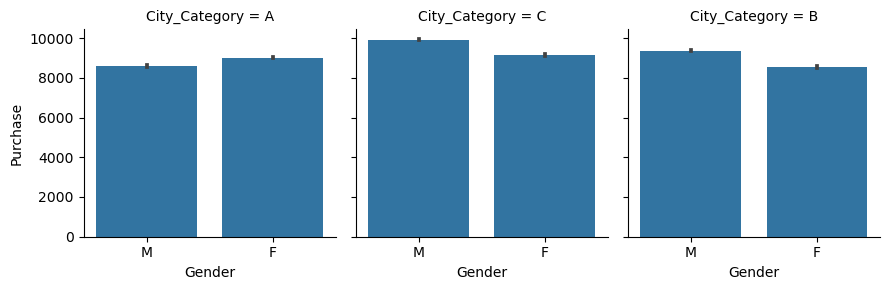

In [39]:
g = sns.FacetGrid(train,col="City_Category")
g.map(sns.barplot, "Gender", "Purchase")
plt.show()

In [41]:
df_combined['User_ID'] = df_combined['User_ID'] - 1000000

df_combined['Product_ID'] = df_combined['Product_ID'].str.replace('P00', '')

df_combined['Product_ID'] = pd.to_numeric(df_combined['Product_ID'],errors='coerce')

In [43]:
import numpy as np

In [47]:
#df_combined['Product_Category_2'] = df_combined['Product_Category_2'].fillna(0)

In [49]:
vc = df_combined.Product_Category_3.value_counts(normalize = True)
miss = df_combined.Product_Category_3.isna()
df_combined.loc[miss, 'Product_Category_3'] = np.random.choice(vc.index, size = miss.sum(), p = vc.values)

In [51]:
df_combined = df_combined.drop(columns=['Product_Category_3'])

In [53]:
df_combined.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

In [55]:
df_combined['Gender'] = df_combined['Gender'].map({'F':0, 'M':1}).astype(int)

In [57]:
df_combined['Gender'].value_counts()

Gender
1    590031
0    193636
Name: count, dtype: int64

In [59]:
df_combined['Age'] = df_combined['Age'].map({'0-17': 9,
                               '18-25': 22,
                               '26-35': 31,
                               '36-45': 42,
                               '46-50': 48,
                               '51-55': 53,
                               '55+': 60})

In [61]:
df_combined['Age'].value_counts()

Age
31    313015
42    156724
22    141953
48     65278
53     54784
60     30579
9      21334
Name: count, dtype: int64

In [63]:
df_combined['Stay_In_Current_City_Years'] = np.where(df_combined['Stay_In_Current_City_Years'].str[:2]=="4+",4,df_combined['Stay_In_Current_City_Years'])

df_combined['Stay_In_Current_City_Years'] = pd.to_numeric(df_combined['Stay_In_Current_City_Years'],errors='coerce')

In [65]:
cat_cols = df_combined.select_dtypes(['object','category']).columns
cat_cols

Index(['City_Category'], dtype='object')

In [67]:
df_combined = pd.get_dummies(df_combined, columns = ['City_Category'], drop_first=True)

In [69]:
df_combined

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_B,City_Category_C
0,1,69042,0,9,10,2,0,3,0.0,8370.0,False,False
1,1,248942,0,9,10,2,0,1,6.0,15200.0,False,False
2,1,87842,0,9,10,2,0,12,0.0,1422.0,False,False
3,1,85442,0,9,10,2,0,12,14.0,1057.0,False,False
4,2,285442,1,60,16,4,0,8,0.0,7969.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,6036,118942,0,31,15,4,1,8,0.0,NaN,True,False
233595,6036,254642,0,31,15,4,1,5,8.0,NaN,True,False
233596,6036,31842,0,31,15,4,1,1,5.0,NaN,True,False
233597,6037,124742,0,48,1,4,0,10,16.0,NaN,False,True


In [71]:
#df_combined = df_combined.drop(columns=['Product_ID','User_ID'])

In [73]:
df_combined

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_B,City_Category_C
0,1,69042,0,9,10,2,0,3,0.0,8370.0,False,False
1,1,248942,0,9,10,2,0,1,6.0,15200.0,False,False
2,1,87842,0,9,10,2,0,12,0.0,1422.0,False,False
3,1,85442,0,9,10,2,0,12,14.0,1057.0,False,False
4,2,285442,1,60,16,4,0,8,0.0,7969.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,6036,118942,0,31,15,4,1,8,0.0,NaN,True,False
233595,6036,254642,0,31,15,4,1,5,8.0,NaN,True,False
233596,6036,31842,0,31,15,4,1,1,5.0,NaN,True,False
233597,6037,124742,0,48,1,4,0,10,16.0,NaN,False,True


In [75]:
train_data = df_combined[df_combined['Purchase'].notna()]
test_data = df_combined[df_combined['Purchase'].isna()]

In [77]:
test_data_copy=test_data.copy()

In [79]:
x_train = train_data.drop('Purchase', axis = 1)
y1_train = train_data['Purchase']

In [81]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x_train,y1_train,test_size=0.30,random_state=0)

In [83]:
from xgboost import XGBRegressor

In [85]:
XGB = XGBRegressor(n_estimators=500,max_depth=10,learning_rate=0.05)

In [87]:
XGB.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [89]:
y_predt = XGB.predict(X_test)

In [91]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [93]:
rmse = np.sqrt(mean_squared_error(y_test, y_predt))
print("RMSE:", rmse)

RMSE: 2551.657530543068


In [95]:
XGB.fit(x_train,y1_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [97]:
test_data = test_data.drop(columns=['Purchase'])

In [99]:
y_pred = XGB.predict(test_data)

In [101]:
prediction = pd.DataFrame({"Purchase":y_pred, "User_ID":test.User_ID, "Product_ID":test.Product_ID})

In [103]:
prediction.to_csv(r"C:\Users\Reet Dengle\Desktop\311\sem 5\DWR\final project\XGB_Solution.csv", index = False)